In [1]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
time_series = pd.read_csv('time_series.csv')

In [3]:
time_series.head()

,Unnamed: 0,time,bytes
0,0,[01/Jun/1995:00:00:59,271
1,1,[01/Jun/1995:00:02:51,205908
2,2,[01/Jun/1995:00:05:44,271
3,3,[01/Jun/1995:00:08:06,1116
4,4,[01/Jun/1995:00:08:19,49649


In [4]:
time_series = time_series[['time','bytes']]

In [5]:
time_series.head()

,time,bytes
0,[01/Jun/1995:00:00:59,271
1,[01/Jun/1995:00:02:51,205908
2,[01/Jun/1995:00:05:44,271
3,[01/Jun/1995:00:08:06,1116
4,[01/Jun/1995:00:08:19,49649


In [6]:
time_series['requests'] = 1

In [7]:
time_series.head()

,time,bytes,requests
0,[01/Jun/1995:00:00:59,271,1
1,[01/Jun/1995:00:02:51,205908,1
2,[01/Jun/1995:00:05:44,271,1
3,[01/Jun/1995:00:08:06,1116,1
4,[01/Jun/1995:00:08:19,49649,1


In [8]:
time_series.count()

time        1160193
bytes       1160182
requests    1160193
dtype: int64

In [9]:
time_series.fillna(0,inplace=True)

In [10]:
time_series.count()

time        1160193
bytes       1160193
requests    1160193
dtype: int64

In [11]:
time_series['time'] = pd.to_datetime(time_series['time'],format='[%d/%b/%Y:%H:%M:%S')

In [12]:
time_series.head()

,time,bytes,requests
0,1995-06-01 00:00:59,271,1
1,1995-06-01 00:02:51,205908,1
2,1995-06-01 00:05:44,271,1
3,1995-06-01 00:08:06,1116,1
4,1995-06-01 00:08:19,49649,1


In [13]:
time_series.to_csv('time_series_cleaned.csv')

In [14]:
time_series.dtypes

time        datetime64[ns]
bytes               object
requests             int64
dtype: object

In [15]:
time_series['bytes'] = pd.to_numeric(time_series['bytes'],errors='ignore')

In [16]:
hourly_data = pd.DataFrame()

In [17]:
time_series['date'] = time_series.time.dt.date

In [18]:
time_series['hour'] = time_series.time.dt.hour

In [19]:
time_series.head()

,time,bytes,requests,date,hour
0,1995-06-01 00:00:59,271,1,1995-06-01,0
1,1995-06-01 00:02:51,205908,1,1995-06-01,0
2,1995-06-01 00:05:44,271,1,1995-06-01,0
3,1995-06-01 00:08:06,1116,1,1995-06-01,0
4,1995-06-01 00:08:19,49649,1,1995-06-01,0


In [20]:
hourly_series = time_series.groupby(['date','hour'])['requests'].sum().reset_index()

In [93]:
hourly_series.to_csv('hourly_data.csv')

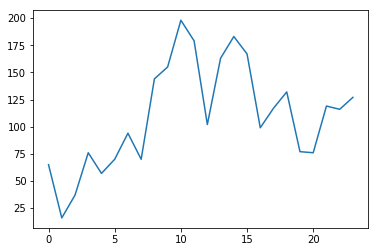

In [21]:
hourly_series['requests'].head(24).plot()

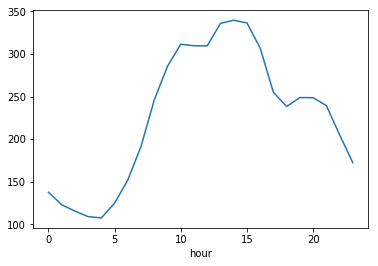

In [23]:
hourly_series.groupby('hour')['requests'].mean().plot()

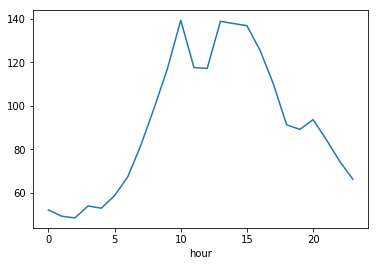

In [27]:
hourly_series.groupby('hour')['requests'].std().plot()

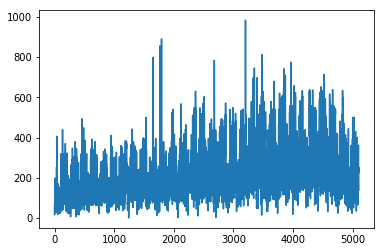

In [29]:
hourly_series.requests.plot()

In [30]:
hourly_series.head(25)

,date,hour,requests
0,1995-06-01,0,65
1,1995-06-01,1,16
2,1995-06-01,2,37
3,1995-06-01,3,76
4,1995-06-01,4,57
5,1995-06-01,5,70
6,1995-06-01,6,94
7,1995-06-01,7,70
8,1995-06-01,8,144
9,1995-06-01,9,155
